In [1]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train, y_train)
pred = lr.predict(X_test)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


In [4]:
import matplotlib.pyplot as plt
import mglearn

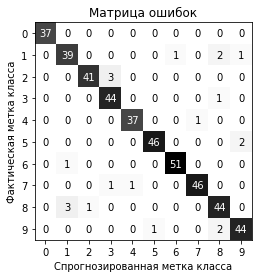

In [5]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Спрогнозированная метка класса',
    ylabel='Фактическая метка класса', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Матрица ошибок')
plt.gca().invert_yaxis()

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [7]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.92      0.91        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



Возможен выбор усреднения f1-меры по одной из трёх стратегий: macro (нахождение невзвешенного среднего по классам), weighted (нахождение среднего по классам, взвешенного по поддержке ), micro (нахождение FPR, FNR, TPR по всем классам, а затем вычисление точности, полноты и f1-меры с помощью этих показателей)

In [8]:
print('Микро-усреднённая f1-мера: {:.3f}'.format(
    f1_score(y_test, pred, average='micro')))
print('Взвешенно-усреднённая f1-мера: {:.3f}'.format(
    f1_score(y_test, pred, average='weighted')))
print('Макро-усреднённая f1-мера: {:.3f}'.format(
    f1_score(y_test, pred, average='macro')))

Микро-усреднённая f1-мера: 0.953
Взвешенно-усреднённая f1-мера: 0.953
Макро-усреднённая f1-мера: 0.954


In [10]:
print('Метрика качества по умолчанию: {}'.format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
    scoring='accuracy')
print('Метрика качества - явно заданная (правильность): {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
    scoring='roc_auc')
print('Метрика качества - AUC: {}'.format(roc_auc))

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества - явно заданная (правильность): [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества - AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print('Решетчатый поиск с использованием правильности')
print('Наилучшие параметры:', grid.best_params_)
print('Наилучшее значение перекрёстной проверки (правильность): {:.3f}'.format(
    grid.best_score_))
print('AUC на тестовом наборе: {:.3f}'.format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print('Правильность на тестовом наборе: {:.3f}'.format(
    grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекрёстной проверки (правильность): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [13]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('Решетчатый поиск с использованием AUC')
print('Наилучшие параметры:', grid.best_params_)
print('Наилучшее значение перекрестной проверки (AUC): {:.3f}'.format(
    grid.best_score_))
print('AUC на тестовом наборе: {:.3f}'.format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print('Правильность на тестовом наборе: {:.3f}'.format(
    grid.score(X_test, y_test)))

Решетчатый поиск с использованием AUC
Наилучшие параметры: {'gamma': 0.01}
Наилучшее значение перекрестной проверки (AUC): 0.998
AUC на тестовом наборе: 1.000
Правильность на тестовом наборе: 1.000


Помимо Accuracy и roc_auc, в scikit-learn доступно множество других Скореров:

In [14]:
from sklearn.metrics._scorer import SCORERS
print('Доступные объекты scorer:\n{}'.format(sorted(SCORERS.keys())))

Доступные объекты scorer:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accura